In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Recarregar os dados e reusar os resultados
df = pd.read_csv("../data/vehicle_sensor_data.csv")



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Recarregar o dataset e preparar dados
df = pd.read_csv("../data/vehicle_sensor_data.csv")

X = df.drop('failure', axis=1)
y = df['failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Treinar novamente e gerar previsões
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


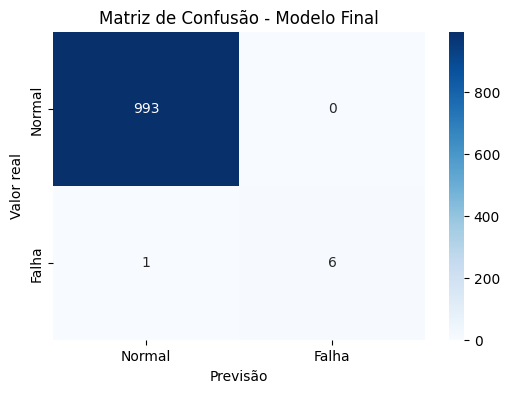

In [14]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal','Falha'], yticklabels=['Normal','Falha'])
plt.xlabel("Previsão")
plt.ylabel("Valor real")
plt.title("Matriz de Confusão - Modelo Final")
plt.show()


In [15]:
from sklearn.metrics import classification_report, accuracy_score

# Relatório completo
report = classification_report(y_test, y_pred, target_names=['Normal', 'Falha'])
print("🔎 Relatório de Classificação:\n")
print(report)

# Acurácia geral
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Acurácia Geral: {accuracy:.4f}")


🔎 Relatório de Classificação:

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       993
       Falha       1.00      0.86      0.92         7

    accuracy                           1.00      1000
   macro avg       1.00      0.93      0.96      1000
weighted avg       1.00      1.00      1.00      1000

✅ Acurácia Geral: 0.9990
